# Hackathon

Some utilities

## Import Utils

In [2]:
ls

data/  fileCountLabels.pickle  hackathon/


In [3]:
!pip install keras

    100% |################################| 337kB 2.8MB/s ta 0:00:01
    100% |################################| 256kB 3.5MB/s ta 0:00:01
  Running setup.py bdist_wheel for pyyaml ... done
  Stored in directory: /root/.cache/pip/wheels/2c/f7/79/13f3a12cd723892437c0cfbde1230ab4d82947ff7b3839a4fc
Successfully built pyyaml
You are using pip version 9.0.1, however version 9.0.2 is available.
You should consider upgrading via the 'pip install --upgrade pip' command.


In [1]:
cd ..

/notebooks/Data


In [4]:
import keras
import h5py as h5
import numpy as np
import pandas as pd

PATH_DATA = 'data/full.h5'
PATH_PREDICT_WITHOUT_GT = 'data/pred_eighties_from_full_1_without_gt.h5'
#PATH_SUBMIT = 'data/submit/pred_eighties_from_half_1_AWESOMEGROUP.h5'
#PATH_PREDICT_WITH_GT = 'data/pred_teachers/pred_eighties_from_half_1.h5'

/usr/local/lib/python3.5/dist-packages/h5py/__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters
Using TensorFlow backend.


In [5]:
BATCH_SIZE = 32
from keras.models import Sequential
from keras.layers import Dense, Flatten, Conv2D, BatchNormalization, Activation, MaxPooling2D, Dropout
import keras.layers.normalization 
from keras.callbacks import Callback
%load_ext autoreload
%autoreload 2

In [6]:
f = h5.File(PATH_DATA)

In [7]:
range(len(f['S2']))

range(0, 18698240)

In [8]:
def get_idxs(h5_path):
    f = h5.File(h5_path)
    return range(len(f['S2']))

def shuffle_idx(sample_idxs):
    return list(np.random.permutation(sample_idxs))

def split_train_val(sample_idxs, proportion):
    n_samples = len(sample_idxs)
    return sample_idxs[:int((1.-proportion)*n_samples)], sample_idxs[int((1.-proportion)*n_samples):]

def get_batch_count(idxs, batch_size):
    batch_count = int(len(idxs)//batch_size)
    remained_samples = len(idxs)%batch_size
    if remained_samples > 0:
        batch_count += 1

    return batch_count

In [9]:
def generator(h5_path, batch_size, idxs):
    f = h5.File(h5_path, 'r')
    while True : 
        idxs = shuffle_idx(idxs)
        batch_count = get_batch_count(idxs, batch_size)
        for b in range(batch_count):
            batch_idxs = idxs[b*batch_size:(b+1)*batch_size]
            batch_idxs = sorted(batch_idxs)
            X = f['S2'][batch_idxs, :,:,:]
            Y = f['TOP_LANDCOVER'][batch_idxs, :]
            yield np.array(X), keras.utils.np_utils.to_categorical(np.array(Y), 23)

In [10]:
idxs = get_idxs(PATH_DATA)
shuffled_idxs = shuffle_idx(idxs)
train_idxs, val_idxs = split_train_val(shuffled_idxs, 0.2)

In [11]:
train_gen = generator(PATH_DATA, BATCH_SIZE, train_idxs)
train_batch_count = get_batch_count(train_idxs, BATCH_SIZE)

val_gen = generator(PATH_DATA, BATCH_SIZE, val_idxs)
val_batch_count = get_batch_count(val_idxs, BATCH_SIZE)

In [16]:
countLabels = np.zeros([23,2])

for i in range(22):
    countLabels[i+1][0] = countLabels[i][0] + 1

for i in range(len(f['TOP_LANDCOVER'])):
    countLabels[int(f['TOP_LANDCOVER'][i])][1] += 1

In [17]:
countLabels

array([[0.000000e+00, 0.000000e+00],
       [1.000000e+00, 3.827110e+06],
       [2.000000e+00, 1.250253e+06],
       [3.000000e+00, 2.315736e+06],
       [4.000000e+00, 7.769660e+05],
       [5.000000e+00, 2.167443e+06],
       [6.000000e+00, 6.330000e+02],
       [7.000000e+00, 0.000000e+00],
       [8.000000e+00, 0.000000e+00],
       [9.000000e+00, 3.709000e+03],
       [1.000000e+01, 1.112499e+06],
       [1.100000e+01, 7.657050e+05],
       [1.200000e+01, 4.054392e+06],
       [1.300000e+01, 1.281000e+03],
       [1.400000e+01, 6.341420e+05],
       [1.500000e+01, 3.847000e+03],
       [1.600000e+01, 0.000000e+00],
       [1.700000e+01, 8.647100e+04],
       [1.800000e+01, 3.829000e+03],
       [1.900000e+01, 1.154414e+06],
       [2.000000e+01, 5.382200e+05],
       [2.100000e+01, 1.590000e+03],
       [2.200000e+01, 0.000000e+00]])

In [ ]:
#import pickle
#print("countLabels saved")
#fileLabels = open('fileCountLabels.pickle', 'wb')
#pickle.dump(countLabels, fileLabels)
#fileLabels.close()

In [12]:
# Read from file
import pickle
fileLabels = open('fileCountLabels.pickle', 'rb')
countLabels = pickle.load(fileLabels)  # variables come out in the order you put them in
fileLabels.close()
countLabels

array([[0.000000e+00, 0.000000e+00],
       [1.000000e+00, 3.827110e+06],
       [2.000000e+00, 1.250253e+06],
       [3.000000e+00, 2.315736e+06],
       [4.000000e+00, 7.769660e+05],
       [5.000000e+00, 2.167443e+06],
       [6.000000e+00, 6.330000e+02],
       [7.000000e+00, 0.000000e+00],
       [8.000000e+00, 0.000000e+00],
       [9.000000e+00, 3.709000e+03],
       [1.000000e+01, 1.112499e+06],
       [1.100000e+01, 7.657050e+05],
       [1.200000e+01, 4.054392e+06],
       [1.300000e+01, 1.281000e+03],
       [1.400000e+01, 6.341420e+05],
       [1.500000e+01, 3.847000e+03],
       [1.600000e+01, 0.000000e+00],
       [1.700000e+01, 8.647100e+04],
       [1.800000e+01, 3.829000e+03],
       [1.900000e+01, 1.154414e+06],
       [2.000000e+01, 5.382200e+05],
       [2.100000e+01, 1.590000e+03],
       [2.200000e+01, 0.000000e+00]])

In [13]:
tot = np.sum(countLabels[:,1])

In [14]:
countlbl = np.zeros([23,2])
for i in range(22):
    countlbl[i+1][0] = countlbl[i][0] + 1
    
countlbl[:,1] = 100 * countLabels[:,1]/tot #np.around(100 * countLabels[:,1]/tot, decimals = 3)

countlbl

array([[0.00000000e+00, 0.00000000e+00],
       [1.00000000e+00, 2.04677553e+01],
       [2.00000000e+00, 6.68647424e+00],
       [3.00000000e+00, 1.23847806e+01],
       [4.00000000e+00, 4.15528948e+00],
       [5.00000000e+00, 1.15916953e+01],
       [6.00000000e+00, 3.38534536e-03],
       [7.00000000e+00, 0.00000000e+00],
       [8.00000000e+00, 0.00000000e+00],
       [9.00000000e+00, 1.98360915e-02],
       [1.00000000e+01, 5.94975249e+00],
       [1.10000000e+01, 4.09506456e+00],
       [1.20000000e+01, 2.16832814e+01],
       [1.30000000e+01, 6.85091217e-03],
       [1.40000000e+01, 3.39145289e+00],
       [1.50000000e+01, 2.05741289e-02],
       [1.60000000e+01, 0.00000000e+00],
       [1.70000000e+01, 4.62455290e-01],
       [1.80000000e+01, 2.04778632e-02],
       [1.90000000e+01, 6.17391797e+00],
       [2.00000000e+01, 2.87845273e+00],
       [2.10000000e+01, 8.50347412e-03],
       [2.20000000e+01, 0.00000000e+00]])

In [15]:
tailleDB = 700000
DB = np.zeros([tailleDB, 16, 16, 4, 1])

# Correspondance : chaque élément est de type [i,j] où j est la classe originale reliée désormais à l'indice i 
cor = np.zeros([12,2], dtype=int)
for i in range(11):
    cor[i+1][0] = cor[i][0] + 1

tempLab = 0
for i in range(23):
    if countlbl[i,1] > 0.2:
        cor[tempLab][1] = i
        tempLab += 1

lblAdded = np.zeros([23,2], dtype = int)
cor

array([[ 0,  1],
       [ 1,  2],
       [ 2,  3],
       [ 3,  4],
       [ 4,  5],
       [ 5, 10],
       [ 6, 11],
       [ 7, 12],
       [ 8, 14],
       [ 9, 17],
       [10, 19],
       [11, 20]])

In [16]:
int(f['TOP_LANDCOVER'][2])

20

In [17]:
lblComplete = np.zeros([23,2], dtype=int)
for i in range(22):
    lblComplete[i+1][0] = lblComplete[i][0] + 1

for i in range(22):
    if i in cor[:,1]:
        lblComplete[i,1] = countlbl[i,1]/100 * tailleDB
    else:
        lblComplete[i,1] = 0
    
lblComplete
np.sum(lblComplete[:,1])

699438

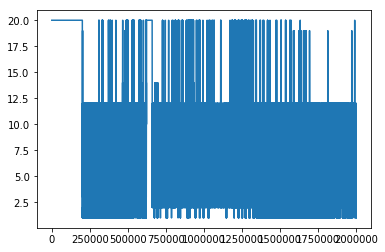

In [72]:
plt.plot(f['TOP_LANDCOVER'][:2000000])

In [126]:
dataBatch = f['S2'][10:10010]
dataClass = f['TOP_LANDCOVER'][10:10010]

In [127]:
type(dataClass)

numpy.ndarray

In [139]:
picTot

6988

In [ ]:
import random

In [18]:
tailleDB = 699438
picTot = 0

DB = np.zeros([tailleDB, 16, 16, 4])
classY = np.zeros(tailleDB, dtype=int)

countlbl = np.zeros([23,2])
for i in range(22):
    countlbl[i+1][0] = countlbl[i][0] + 1

batchLen = 1000

while picTot < tailleDB:
    ra = np.random.randint(0,18698240)
    dataBatch = f['S2'][ra:ra+batchLen]
    classBatch = f['TOP_LANDCOVER'][ra:ra+batchLen]
    pic = 0
    while pic < batchLen:
        if (countlbl[int(classBatch[pic]),1] < lblComplete[int(classBatch[pic]),1]) and (picTot < tailleDB):
            DB[picTot] = dataBatch[pic]
            classY[picTot] = classBatch[pic]
            picTot +=1
            countlbl[int(classBatch[pic]),1] +=1
            if picTot%1000==0:
                print(picTot)
        pic += 1

1000
2000
3000
4000
5000
6000
7000
8000
9000
10000
11000
12000
13000
14000
15000
16000
17000
18000
19000
20000
21000
22000
23000
24000
25000
26000
27000
28000
29000
30000
31000
32000
33000
34000
35000
36000
37000
38000
39000
40000
41000
42000
43000
44000
45000
46000
47000
48000
49000
50000
51000
52000
53000
54000
55000
56000
57000
58000
59000
60000
61000
62000
63000
64000
65000
66000
67000
68000
69000
70000
71000
72000
73000
74000
75000
76000
77000
78000
79000
80000
81000
82000
83000
84000
85000
86000
87000
88000
89000
90000
91000
92000
93000
94000
95000
96000
97000
98000
99000
100000
101000
102000
103000
104000
105000
106000
107000
108000
109000
110000
111000
112000
113000
114000
115000
116000
117000
118000
119000
120000
121000
122000
123000
124000
125000
126000
127000
128000
129000
130000
131000
132000
133000
134000
135000
136000
137000
138000
139000
140000
141000
142000
143000
144000
145000
146000
147000
148000
149000
150000
151000
152000
153000
154000
155000
156000
157000
158000
15

In [22]:
import h5py

h5f = h5py.File('Db_proportions.h5', 'w')
h5f.create_dataset('dataset_prop', data=DB)
h5f.close()

In [20]:
DB[0,0,0,0]

2049.0

In [59]:
verif = h5py.File('Db_proportions.h5')

In [60]:
for element in verif.items():
    print(element[0])
    print(element[1])
    print(element[1].name)
verif.close()

dataset_prop
<HDF5 dataset "dataset_prop": shape (699438, 16, 16, 4), type "<f8">
/dataset_prop


In [61]:
list_elmts = [key for key in verif['/'].keys()]
for key in list_elmts:
    print(key)
    print(type(verif['/'][key]))
    print(verif['/'][key])
    print([key for key in verif['/'][key].keys()])

ValueError: Not a location (invalid object ID)

In [13]:
idxs_test = get_idxs(PATH_PREDICT_WITHOUT_GT)

In [14]:
print(train_batch_count, val_batch_count)

58432 14608


# Instanciation du model

In [ ]:
#model 1
input_shape = (16,16,4)
model = Sequential()
model.add(BatchNormalization(input_shape=input_shape))
model.add(Conv2D(8,(5,5),activation='relu',input_shape =(16,16,4)))
model.add(MaxPooling2D(pool_size=(2,2)))

model.add(Conv2D(8,(5,5),activation='relu',input_shape =(16,16,4)))
model.add(MaxPooling2D(pool_size=(2,2)))

model.add(Flatten())
model.add(Dense(200,activation ='relu'))
model.add(Dropout(0.01))

model.add(Dense(23,activation ='softmax'))


In [149]:
#model 2
input_shape=(16,16,4)
model2 = Sequential()
model2.add(BatchNormalization(input_shape=input_shape))

model2.add(Conv2D(32, (5, 5), input_shape=input_shape))
model2.add(Activation('relu'))

model2.add(Conv2D(32, (5, 5)))
model2.add(Activation('relu'))

model2.add(Conv2D(32, (4, 4)))
model2.add(Activation('relu'))

model2.add(Conv2D(64, (3, 3)))
model2.add(Activation('relu'))

model2.add(Conv2D(64, (3, 3)))
model2.add(Activation('relu'))


model2.add(Flatten())
model2.add(Dense(64))
model2.add(Activation('relu'))
model2.add(Dropout(0.01))
model2.add(Dense(23))
model2.add(Activation('softmax'))

# Fit

In [17]:
# optim = keras.optimizers.Adam(lr=0.001)
optim = keras.optimizers.rmsprop(lr=0.0001, decay=1e-6)

model2.compile(optimizer=optim,
              loss='categorical_crossentropy',
              metrics=['accuracy'])

history = model2.fit_generator(train_gen, steps_per_epoch=100, epochs=4, verbose=1, validation_data=val_gen, nb_val_samples=100)

/usr/local/lib/python3.5/dist-packages/ipykernel_launcher.py:8: UserWarning: The semantics of the Keras 2 argument `steps_per_epoch` is not the same as the Keras 1 argument `samples_per_epoch`. `steps_per_epoch` is the number of batches to draw from the generator at each epoch. Basically steps_per_epoch = samples_per_epoch/batch_size. Similarly `nb_val_samples`->`validation_steps` and `val_samples`->`steps` arguments have changed. Update your method calls accordingly.
  
/usr/local/lib/python3.5/dist-packages/ipykernel_launcher.py:8: UserWarning: Update your `fit_generator` call to the Keras 2 API: `fit_generator(<generator..., epochs=4, verbose=1, steps_per_epoch=100, validation_data=<generator..., validation_steps=100)`
  


Epoch 1/4
 33/100 [========>.....................] - ETA: 1:16 - loss: 1.6108 - acc: 0.4432- ETA: 1:17 - loss: 1.6107 - acc: 0.443

/usr/local/lib/python3.5/dist-packages/keras/callbacks.py:120: UserWarning: Method on_batch_end() is slow compared to the batch update (0.247925). Check your callbacks.
  % delta_t_median)


 37/100 [==========>...................] - ETA: 1:11 - loss: 1.6267 - acc: 0.4299

/usr/local/lib/python3.5/dist-packages/keras/callbacks.py:120: UserWarning: Method on_batch_end() is slow compared to the batch update (0.256323). Check your callbacks.
  % delta_t_median)


100/100 [==============================] - 186s 2s/step - loss: 1.5697 - acc: 0.4431 - val_loss: 1.4774 - val_acc: 0.4556
Epoch 2/4
 55/100 [===============>..............] - ETA: 32s - loss: 1.4588 - acc: 0.48

/usr/local/lib/python3.5/dist-packages/keras/callbacks.py:120: UserWarning: Method on_batch_end() is slow compared to the batch update (0.300792). Check your callbacks.
  % delta_t_median)


 56/100 [===============>..............] - ETA: 31s - loss: 1.4564 - acc: 0.4827

/usr/local/lib/python3.5/dist-packages/keras/callbacks.py:120: UserWarning: Method on_batch_end() is slow compared to the batch update (0.615100). Check your callbacks.
  % delta_t_median)


100/100 [==============================] - 135s 1s/step - loss: 1.4669 - acc: 0.4653 - val_loss: 1.4013 - val_acc: 0.4719
Epoch 3/4
 71/100 [====================>.........] - ETA: 16s - loss: 1.4362 - acc: 0.45

/usr/local/lib/python3.5/dist-packages/keras/callbacks.py:120: UserWarning: Method on_batch_end() is slow compared to the batch update (0.180159). Check your callbacks.
  % delta_t_median)


 72/100 [====================>.........] - ETA: 15s - loss: 1.4342 - acc: 0.4583

/usr/local/lib/python3.5/dist-packages/keras/callbacks.py:120: UserWarning: Method on_batch_end() is slow compared to the batch update (0.357577). Check your callbacks.
  % delta_t_median)


 77/100 [======================>.......] - ETA: 12s - loss: 1.4400 - acc: 0.4590

/usr/local/lib/python3.5/dist-packages/keras/callbacks.py:120: UserWarning: Method on_batch_end() is slow compared to the batch update (0.180173). Check your callbacks.
  % delta_t_median)


100/100 [==============================] - 107s 1s/step - loss: 1.4413 - acc: 0.4619 - val_loss: 1.3675 - val_acc: 0.5112
Epoch 4/4
100/100 [==============================] - 85s 854ms/step - loss: 1.3848 - acc: 0.4959 - val_loss: 1.3417 - val_acc: 0.5300


In [19]:
import matplotlib.pyplot as plt
plt.figure(figsize=(10,5))

for i, (name, values) in enumerate(history.history.items()):
    plt.subplot(1, len(history.history.items()), i+1)
    plt.plot(values)
    plt.title(name)

## Prediction routines

In order to submit a result here are some gits

In [20]:
import os 
def prediction_generator(h5_path, batch_size, idxs):
    f = h5.File(h5_path, 'r')

    batch_count = get_batch_count(idxs, batch_size)
    
    for b in range(batch_count):
        batch_idxs = idxs[b*batch_size:(b+1)*batch_size]
        batch_idxs = sorted(batch_idxs)
        X = f['S2'][batch_idxs, :,:,:]
        yield np.array(X)

def build_h5_pred_file(pred, h5_output_path):
    if os.path.exists(h5_output_path):
        os.remove(h5_output_path)
    f = h5.File(h5_output_path, 'w')
    top_landcover_submit = f.create_dataset("TOP_LANDCOVER", (len(pred), 1), maxshape=(None, 1))
    top_landcover_submit[:, 0] = pred
    f.close()
    
    return 1

In [21]:
pred_idx = get_idxs(PATH_PREDICT_WITHOUT_GT)
print(len(pred_idx))
pred_gen = prediction_generator(PATH_PREDICT_WITHOUT_GT, BATCH_SIZE, pred_idx)
prediction = model2.predict_generator(pred_gen, steps=get_batch_count(pred_idx, BATCH_SIZE), verbose=1)
print(prediction)
#build_h5_pred_file(np.argmax(prediction, axis = 1), PATH_SUBMIT)

241700
7554/7554 [==============================] - 55s 7ms/step
[[9.76281764e-04 1.12003572e-01 1.63824931e-01 ... 1.81098655e-02
  2.99025211e-04 5.51709381e-04]
 [1.22614484e-03 1.26599997e-01 1.66903391e-01 ... 1.89606436e-02
  3.83822393e-04 6.63267507e-04]
 [2.20993927e-04 1.18313141e-01 1.69867322e-01 ... 8.95379391e-03
  4.44842190e-05 9.64496576e-05]
 ...
 [1.90842346e-08 7.59730563e-02 1.31809399e-01 ... 1.18176438e-04
  3.99783762e-10 2.23743646e-09]
 [1.43819747e-08 7.82184154e-02 1.30608007e-01 ... 1.02649254e-04
  2.79749002e-10 1.62017577e-09]
 [1.58388391e-09 6.69135153e-02 1.19459398e-01 ... 3.51556919e-05
  1.79914712e-11 1.37707554e-10]]


In [22]:
def resultat_avec_csv(modele,name,path):

    pred_idx = get_idxs(path)
    pred_gen = prediction_generator(path, BATCH_SIZE, pred_idx)
    prediction = modele.predict_generator(pred_gen, steps=get_batch_count(pred_idx, BATCH_SIZE), verbose=1)
    class_prediction = np.argmax(prediction, axis = 1)
    tosubmit = pd.DataFrame([pred_idx,class_prediction]).transpose()
    tosubmit.columns=["ID","TOP_LANDCOVER"]
    to_submit_csv = tosubmit.to_csv('%s.csv'%(name),sep=',',index= False)
    return prediction

def resultat(modele,path):

    pred_idx = get_idxs(path)
    pred_gen = prediction_generator(path, BATCH_SIZE, pred_idx)
    prediction = modele.predict_generator(pred_gen, steps=get_batch_count(pred_idx, BATCH_SIZE), verbose=1)


    return prediction

In [23]:
essai =resultat(model2,PATH_DATA)

73040/73040 [==============================] - 656s 9ms/step


In [39]:
resultat_avec_csv(model2,"jubois_palmi",PATH_PREDICT_WITHOUT_GT)

7554/7554 [==============================] - 26s 3ms/step


array([[9.9660211e-11, 8.4121279e-02, 3.4232554e-01, ..., 4.5173999e-04,
        4.6455093e-10, 2.8604871e-10],
       [1.7313005e-09, 1.1067322e-01, 3.2208198e-01, ..., 1.0815704e-03,
        6.5419901e-09, 4.2342156e-09],
       [3.0984508e-09, 1.3462625e-01, 3.0020055e-01, ..., 1.2697232e-03,
        1.0505762e-08, 7.1851631e-09],
       ...,
       [1.0479813e-12, 2.6873988e-01, 2.6513755e-01, ..., 1.5551517e-04,
        7.4793383e-12, 3.1750498e-12],
       [3.9770281e-13, 2.6727322e-01, 2.6300016e-01, ..., 1.1098615e-04,
        3.2056699e-12, 1.2805918e-12],
       [1.5598832e-14, 2.5929594e-01, 2.3904133e-01, ..., 3.0717980e-05,
        1.7301122e-13, 6.0752808e-14]], dtype=float32)

## Some ideas for monitoring

In [23]:
7700/32


240.625

In [24]:
def gt_generator(h5_path, batch_size, idxs):
    f = h5.File(h5_path, 'r')

    batch_count = get_batch_count(idxs, batch_size)
    print(batch_count)
    for b in range(batch_count):
        if (b+1)*batch_size<
        batch_idxs = idxs[b*batch_size:(b+1)*batch_size]
        batch_idxs = sorted(batch_idxs)
        print(max(batch_idxs))
        Y = f['TOP_LANDCOVER'][batch_idxs, :]
        yield keras.utils.np_utils.to_categorical(np.array(Y), 23)

gt_gen = gt_generator(PATH_DATA, BATCH_SIZE, pred_idx)
gt = []
for elem in gt_gen:
    gt.append(elem)
gt = np.vstack(gt)

SyntaxError: invalid syntax (<ipython-input-24-903c278e97ce>, line 7)

In [25]:
import itertools
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    fmt = '.2f' #if normalize else '.i'
    thresh = cm.max() / 2.
    for i in range(cm.shape[0]):
        for j in range(cm.shape[1]):
            plt.text(j, i, format(cm[i, j], fmt),
                     horizontalalignment="center",
                     color="white" if cm[i, j] > thresh else "black",fontsize=7)

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

In [26]:
def clean_confusion_matrix(confusion_matrix, classes):
    real_classes = []
    for c in range(len(classes)):
        if np.sum(confusion_matrix[:,c])+np.sum(confusion_matrix[c, :]) != 0:
            real_classes.append(c)
    real_confusion_matrix = np.empty((len(real_classes), len(real_classes)))  
    for c_index in range(len(real_classes)):
        real_confusion_matrix[c_index,:] = confusion_matrix[real_classes[c_index], real_classes]
    return real_confusion_matrix, real_classes

In [27]:
list_top=list(f['TOP_LANDCOVER'])

Normalized confusion matrix


/usr/local/lib/python3.5/dist-packages/ipykernel_launcher.py:12: RuntimeWarning: invalid value encountered in true_divide
  if sys.path[0] == '':


<IPython.core.display.Javascript object>


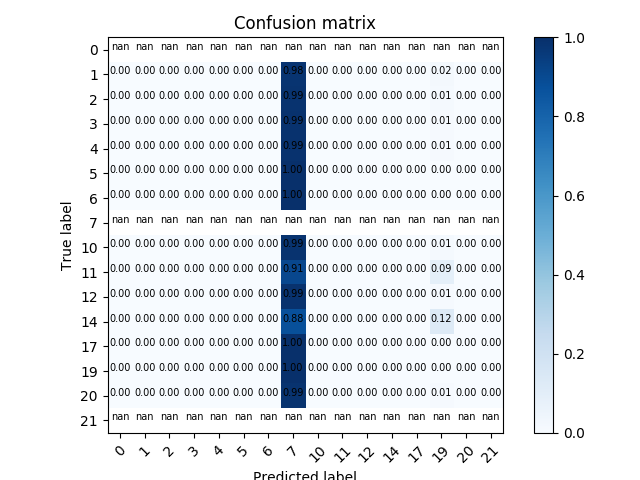

/usr/local/lib/python3.5/dist-packages/numpy/core/_methods.py:26: RuntimeWarning: invalid value encountered in reduce
  return umr_maximum(a, axis, None, out, keepdims)


In [44]:
%matplotlib notebook
from sklearn.metrics import confusion_matrix
y_true = np.array(list_top)
y_pred = np.argmax(essai, axis = 1)

real_cnf_matrix, real_classes = clean_confusion_matrix(confusion_matrix(y_true, y_pred, labels= range(23)), range(23))
plot_confusion_matrix(real_cnf_matrix, classes = real_classes, normalize=True)

In [29]:
list_top[:20][0][0]

12.0

In [ ]:
len(list_top)